# Física Computacional 2022-1, Práctica 2
### Fernando Maldonado Cortés

In [83]:
from pylab import *
from IPython.display import Image,display,Markdown,Math,Latex

In [84]:
#Métodos de integración numérica
def simpson(f,a,b,N):
    h = (b-a)/N
    I = h*(f(a)+f(b))/3
    for i in range(2,N-1,2):
        I += h*2*f(a+(i*h))/3
    for j in range(1,N,2):
        I += h*4*f(a+(j*h))/3
    return I

def trapecio(f,a,b,N):
    h = (b-a)/N
    I = h*(f(a)+f(b))/2
    for i in range(1,N,1):
        I += h*f(a+(i*h))
    return I

## 1

Una masa $m$ está unida a un resorte de longitud $L$ y constante de proporcionalidad $k$. El coeficiente de fricción entre la masa y la varilla es $\mu$. La aceleración de la masa se expresa como:

 $$a(x) = \mu g + \frac{k}{m \tan \left ( \mu b +x \right )}\left ( 1- \frac{b}{\sqrt{b^{2}+x^{2}}} \right ).$$

Si la masa es liberada desde el reposo en $x=0$,  su velocidad  en $x=b$ es dada por:

$$ v_{o} = \sqrt{2\int_{0}^{b}a(x)dx} . $$

**a)** Encuentra $v_{o}$ para $m = 1kg$, $b = 1metro $, $\mu = 0.5$, $k = 100 N/m$ y $g=9.8 m/s^{2}.$

In [85]:
m=1
g=9.8

def a(b,mu,k,x):
    return mu*g+k/(m*np.tan(mu*b+x))*(1-b/((b**2+x**2)**(1/2)))

a0=lambda x:a(1,0.5,100,x)

A=trapecio(a0,0,1,100)

v0=sqrt(2*A)

Latex('El valor de $v_0$ es %s' %v0)

<IPython.core.display.Latex object>

**b)** Gráfica la energía cinetica para 200 valores de $\mu$, $0.1 \leq  \mu \leq 1$, si b=1. Realiza una grafica $\mu$ vs $E$.

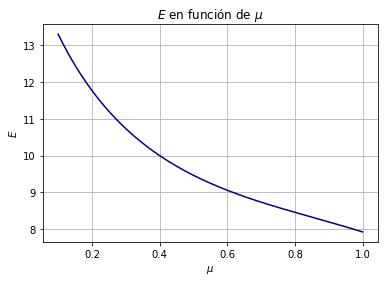

In [86]:
MU=np.linspace(0.1,1,200)
cinetica=[]
for i in MU:
    mu=i
    a1=lambda x:a(1,mu,100,x)
    int1=trapecio(a1,0,1,70)
    v0=sqrt(2*int1)
    E=(m/2)*v0**2
    cinetica.append(E)
plot(MU, cinetica, color='navy')
title('$E$ en función de $\mu$')
xlabel('$\mu$')
ylabel('$E$')
grid()

*En la gráfica observamos que conforme el valor de $\mu$ aumenta, la energía decrece por lo que estas son inversamente proporcionales. Esto tiene sentido físico pues mientras el coeficiente de fricción sea mayor, el movimiento de la masa estará más limitado, en el sentido de que esta no podrá ganar tanta velocidad y por lo tanto, la energía cinética $T=\frac{1}{2}m v^2$ se verá reducida por esto.*

**c)** Gráfica (con 100 puntos) las distintas velocidades si $b \in (0.1, 1]$ y $k=100$ $\mu = 0.5$. Repite el procedimiento para $k=50$, $\mu =1$. Elije la mejor forma de presentar las dos graficas.

Interpreta tus resultados, dando información física del sistema. 

In [87]:
B=linspace(0.1,1,100)
V0=[]
V1=[]
for i in B:
    b=i
    a2=lambda x:a(b,0.5,100,x)
    a3=lambda x:a(b,1,50,x)
    int2=trapecio(a2,0,b,100)
    int3=trapecio(a3,0,b,100)
    V0.append(np.sqrt(2*int2))
    V1.append(np.sqrt(2*int3))

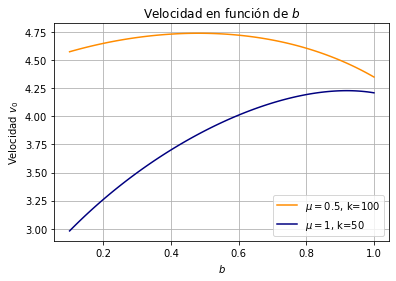

In [88]:
plot(B,V0,color='darkorange')
plot(B,V1,color='navy')
title('Velocidad en función de $b$')
xlabel('$b$')
ylabel('Velocidad $v_0$')
legend(('$\mu=0.5$, k=100','$\mu=1$, k=50'))
grid()
plt.show()

*En la gráfica podemos ver que la velocidad de la masa tiene un comportamiento creciente y luego decreciente dependiendo del valor de $b$. Este máximo se encuentra aproximadamente en el valor determinado por $\mu$, es decir el coeficiente de fricción es el que principalmente determina que tan grande puede ser la velocidad de la masa. $b$ se puede interpretar en este sentido como el rango de posiciones en el que se puede mover la partícula, siendo como un límite en la constante del resorte antes de que este pierda su elasticidad.*

## 2

La fórmula de Debye para la capacidad calorífica de un sólido  en límite de bajas temperaturas puede ser aproximada como:

$$ \frac{C_{v}}{N k_{b}} \sim  9 \left ( \frac{T}{T_{D}} \right )^{3} \int_{0}^{T_{D}/T} \frac{x^{4}e^{x}}{\left ( e^{x}-1 \right )^{2}}dx.$$


Los terminos de la ecuacion son:

$N$ numero de particulas en el solido

$k_{b}$ la constante de Boltzmann

$T$ la tempetatura absoluta

$T_{D}$ la temperatura de  Debye.


**a)** Encuentra la capacidad calorífica de los siguientes solidos, si la temperatura varia entre 1.5 y 150 Kelvin. Cosidera $N = 1$, $k_{b}=1$

* Plata   $T_{D}= 215 K$

* Aluminio $T_{D}= 420 K$

* Barium $T_{D}= 111 K$

* Oro $T_{D}= 162 K$

* Francio $T_{D} = 39 K$

Muestra en una sola grafica la capacidad de cada metal vs la temperatura.  No olvides interpretar tus resultados.



In [89]:
N=1
kb=1
TD_plata=215
TD_alum=420
TD_bario=111
TD_oro=162
TD_fran=39

Trange= linspace(1.5,150,1000)

def f(x):
    return ((x**4)*exp(x))/((exp(x)-1)**2)

Cv_plata, Cv_alum, Cv_bario, Cv_oro, Cv_fran=[],[],[],[],[]

for T in Trange:
    Cv_plata.append(N*kb*9*((T/TD_plata)**3)*simpson(f,0.01,TD_plata/T,200))
    Cv_alum.append(N*kb*9*((T/TD_alum)**3)*simpson(f,0.01,TD_alum/T,200))
    Cv_bario.append(N*kb*9*((T/TD_bario)**3)*simpson(f,0.01,TD_bario/T,200))
    Cv_oro.append(N*kb*9*((T/TD_oro)**3)*simpson(f,0.01,TD_oro/T,200))
    Cv_fran.append(N*kb*9*((T/TD_fran)**3)*simpson(f,0.01,TD_fran/T,200))


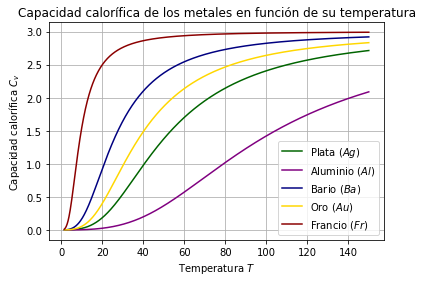

In [90]:
plot(Trange, Cv_plata, color='darkgreen')
plot(Trange, Cv_alum, color='purple')
plot(Trange, Cv_bario, color='navy')
plot(Trange, Cv_oro, color='gold')
plot(Trange, Cv_fran, color='darkred')
legend(('Plata ($Ag$)','Aluminio ($Al$)','Bario ($Ba$)', 'Oro ($Au$)','Francio ($Fr$)'))
title('Capacidad calorífica de los metales en función de su temperatura')
ylabel('Capacidad calorífica $C_v$')
xlabel('Temperatura $T$')
grid()
plt.show()

*En el gráfico observamos (como era de esperarse) que la capacidad calorífica cambia de forma distinta para cada material. Como se está midiendo en Kelvin la temperatura, notamos que para temperaturas cercanas a $T=0$ (cero absoluto)las capacidades caloríficas de todos los metales son bastante bajas, lo cual indica que el metal presentará más resistencia para cambiar su temperatura cuando se le suministre calor. En particular, el Francio es el que más rápido se aproxima a un valor constante de $C_v$, mientras que el Aluminio es el que lo hace de forma más lenta.*

## 3 


En mecánica estadística,  la distribución de probabilidad para las velocidades de un gas ideal se expresa como:

$$ P(v) =  \left ( {\frac{m}{2\pi k_{b} T}}  \right )^{\frac{3}{2}} 4\pi v^{2} exp\left (  \frac{- m v^{2}}{2k_{b} T} \right ). $$


Ejecuta el siguiente codigo para ver la distribucion de velocidades para un gas a diferentes temperaturas, cuya masa de cada particula es lo suficientemente pequena.


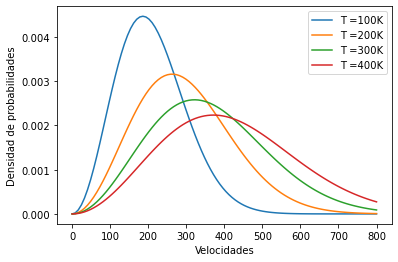

In [91]:
T = [100, 200, 300, 400]
V = linspace(0,800,100)
mb = 80e-27
kB = 1.38e-23

def maxwell_velocidades(v):
    c1 = (mb/(2*pi*kB*t))**(3/2)
    c2 = 4*pi* v**2
    c3 = e**(-mb *v**2/ (2*kB*t) )
    return c1*c2*c3

for t in T:
    plot(V, maxwell_velocidades(V), label = 'T =' +str(t) + 'K')
    xlabel('Velocidades')
    ylabel('Densidad de probabilidades')
    legend()

Mientras que en una dimensión se expresa de la siguiente forma:

$$P(v_{x}) = \sqrt{\frac{m}{2\pi k_{b} T}}exp\left (  \frac{- m v_{x}^{2}}{2k_{b} T} \right ).$$


Si estamos interesados en la probabilidad de que las partículas tengan velocidades entre A y -A sobre el eje x,  necesitamos evaluar la siguiente integral:

$$ I = \int_{-A}^{A} P(v_{x}) dv_{x} = \frac{1}{\sqrt{2\pi}}\int_{-\varphi}^{ \varphi } e^{-x^{2}/2}dx. \qquad con \quad \varphi = A\sqrt{\frac{m}{k_{b}T}} $$


**a)** Encuentra la probabilidad de las particulas si $ A = m =  k_{b} = 1$, para valores de T entre 0 y 100 kelvin, muestra tus resultados en una grafica. Relaciona la informacion de la grafica proporcionada y de la que obtuviste

No olvides interpretar tus resultados, dando informacion fisica del sistema.

In [92]:
T= arange(0.001,100,1)
def g(x):
    return exp(-x**2/2)

prob=[]

for i in T:
    phi=sqrt(1/i)
    w=simpson(g,-phi,phi,100)
    prob.append(w/sqrt(2*pi))

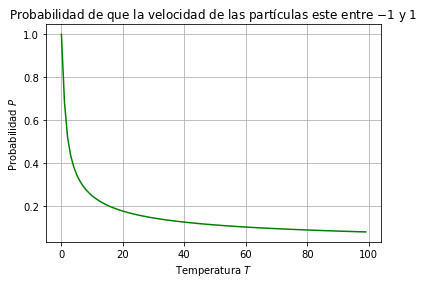

In [93]:
plot(T,prob,color='green')
title('Probabilidad de que la velocidad de las partículas este entre $-1$ y $1$')
xlabel('Temperatura $T$')
ylabel('Probabilidad $P$')
grid()
plt.show()

*La interpretación de esta curva decreciente es que al aumentar la temperatura, la energía cinética de las partículas aumenta, es decir, su velocidad aumenta también y por tanto su rango de velocidades será más amplio que el $[-1,1]$, por lo que a mayor temperatura, esta probabilidad decrece drásticamente.*

## 4 

Un pico de potencial en un circuito eléctrico da como resultado la siguiente corriente a traves de un resistor :

$$i(t)= i_{o}e^{-t/t_{o}}\sin \left ( \frac{2t}{t_{o}} \right ).$$

La Energia disipada por el resistor es:

$$ E = R \int_{0}^{\infty} i^{2}(t) dt. $$

**a)** Encuentra E si $i_{o}=100A$, $R=0.5\Omega$ y $t_{o}=0.01s$

Para poder evaluar esta integral impropia, tenemos que hacer finito el intervalo de integración. Para hacer esto, hacemos el cambio de variable
$$t=\frac{u}{1-u}$$
$$dt=\frac{(1-u)-(-u)}{(1-u)^2}du=\frac{du}{(1-u)^2}$$
Entonces
$$i(u)=i_0e^{-\frac{u}{t0(1-u)}}\sin\left(\frac{2u}{t_0(1-u)}\right)$$
$$\implies \int_{0}^{\infty} i^{2}(t) dt=\int_0^1 i_0^2e^{-\frac{2 u}{t0(1-u)}}\sin^2\left(\frac{2u}{t_0(1-u)}\right)\frac{du}{(1-u)^2}$$

In [100]:
R=0.5
t0=0.01

arg=lambda u: 2*u/(t0*(1-u))
def i(i0, u):
    return (i0**2)*np.exp(-arg(u))*(np.sin(arg(u)))**2/((1-u)**2)

i1=lambda u: i(100,u)

E1=R*simpson(i1,0,0.999,100)
print(E1)

7.731771052354453


**b)** Haz una grafica R vs E  con 200 puntos, si la corriente $i_{o}=100A$ permanece constante y R varia entre 0$\Omega$ y 1$\Omega$. Interpreta tus resultados.

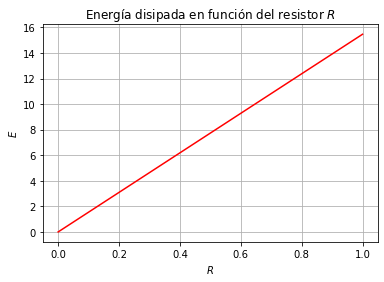

In [105]:
R0=linspace(0,1,200)
E0=[]

for j in R0:
    E=j*simpson(i1,0,0.999,100)
    E0.append(E)

plot(R0,E0,color='red')
title('Energía disipada en función del resistor $R$')
xlabel('$R$')
ylabel('$E$')
grid()
plt.show()

*En la gráfica vemos el comportamiento lineal esperado por la expresión de la energía disipada $E\propto R$. Esto significa que la energía disipada será mayor para una resistencia mayor, pero ambas cantidades crecen a la par.*

**c)** Haz una grafica i vs E  con 200 puntos, si la resistencia $R=1\Omega$ permanece constante y $i_{o}$ varia entre 0A y 100A. Repite el procedimiento para R=2,5,10

Interpreta tus resultados.

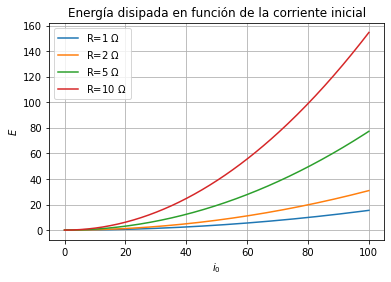

In [106]:
I=linspace(0,100,200)
E1,E2,E3,E4=[],[],[],[]

for j in I:
    i2=lambda u: i(j,u)
    E1.append(simpson(i2,0,0.999,100))
    E2.append(2*simpson(i2,0,0.999,100))
    E3.append(5*simpson(i2,0,0.999,100))
    E4.append(10*simpson(i2,0,0.999,100))

plot(I,E1)
plot(I,E2)
plot(I,E3)
plot(I,E4)
title('Energía disipada en función de la corriente inicial')
xlabel('$i_0$')
ylabel('$E$')
grid()
legend(('R=1 $\Omega$','R=2 $\Omega$','R=5 $\Omega$','R=10 $\Omega$'))
plt.show()

*De esta gráfica podemos ver que para resistencias mayores la energía disipada será más sensible al valor inicial $i_0$, pues crece más rápido en este caso que cuando se tienen resistencias menores. Además este crecimiento es cuadrático debido a la definición de $E$.*

## Extra

La siguiente figura muestra una alambre conductor circular de radio $a$ que lleva una corriente $i$.

In [110]:
Image(filename="Extra.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Extra.png'

El punto P esta a una distancia $r$ desde el centro del alambre con coordenadas esfericas $(r, \theta, \phi)$. La componente $\phi$ del vector potencial en un punto P esta dado por la siguiente integral:

$$ A_{\phi}(r,\theta) = \frac{\mu_{o}}{4\pi} \frac{4i_{o}a}{\sqrt{a^{2}+r^{2}+2ar\sin(\theta)}}\left [ \frac{(2-k^{2})K(k) - 2E(k)}{k^{2}} \right ]. $$

Donde

$$K(k)=\int_{0}^{\pi/2} \frac{d\phi}{\sqrt{1-k^{2}\sin^{2}(\phi)}}.$$

$$E(k)=\int_{0}^{\pi/2} d\phi \sqrt{1-k^{2}\sin^{2}(\phi)} .$$

$$k^{2}=\frac{4ar\sin(\theta)}{a^{2}+r^{2}+2ar\sin(\theta)}.$$

Para $a=1$, $i_{o}=3$ y $\frac{\mu_{o}}{4\pi} = 1$ grafica

**a)** $A_{\phi}(r=1.1,\theta)$ vs $\theta$, donde $\theta \in (0,2\pi]$

**b)** $A_{\phi}(r,\theta=\pi/3)$ vs $r$, donde $r \in (0, 30]$

Con ambas graficas haz un analisis del potencial.